###  Урок 5. Пайплайн исследования данных. Интерпретация моделей для бизнеса

Задание

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
1. провести исследовательский анализ данных,
2. визуализировать результаты и сделать из них выводы,
3. провести предобработку признаков (возможно создать новые),
4. обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5. оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6. проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

Данные

В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Описание данных:
- Customer - идентификатор пользователя
- State - штат
- Customer Lifetime Value - LTV пользователя
- Response - взаимодействие с рекламой
- Coverage - тип страхового покрытия
- Education - образование
- Effective to date - срок действия страховки
- EmploymentStatus - трудоустройство
- Gender - пол
- Income - доход
- Location code - тип местности в которой проживает пользователь
- Marital Status - семейное положение
- Monthly Premium Auto
- Months Since Last Claim - месяцев с последнего требования по выплате компенсации
- Months Since Policy Inception - месяцев с открытия страховки
- Number of Open Complaints - количество незакрытых жалоб
- Number of Policies - количество полисов
- Policy Type - тип страховки
- Policy - страховка
- Renew Offer Type - обновленный тип предложения
- Sales Channel - канал продаж
- Total Claim Amount - сумма выплаченных компенсаций
- Vehicle Class - класс автомобиля
- Vehicle Size - размер автомобиля

Работать будем в гугл колаб, потому все необходимые модули уже должны быть установленны. Для работы на локальном юпитере раскомментируем установку пакетов.

In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install -U scikit-learn

In [8]:
# Посмотрим актуальные для проекта библиотеки
!pip freeze requiements.txt

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.11.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.8
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Запрещаем вывод на экран предупреждений
warnings.filterwarnings('ignore')

In [2]:
# Загрузим датасет игнорируя сбойные строки, если такие присутствуют

train_data = pd.read_csv('/content/LTV.csv', engine='python', on_bad_lines='skip')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Изучим что из себя представляют данные. Для полного вывода данных воспользуемся параметром 'display.max_columns'

In [7]:
pd.set_option('display.max_columns', None)
train_data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
# Метод info() показал что у нас чистые данные без пропусков. В качесте вальтеративы можеи посчитать количество пустых значений по строкам

print(train_data.isnull().sum(axis=0))

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [10]:
# Проверим данные на наличие дубликатов.

print(len(train_data)- len(train_data.drop_duplicates()))

0


Данные с которыми мы будем работать достаточно качественные и не требуют дополнительной очистки.
Целевая переменная у нас это Customer Lifetime Value. Создадим два датафрейма  с матрицей признаков и уелевой переменной

In [11]:
X = train_data.drop('Customer Lifetime Value', axis = 1)
y = pd.DataFrame(train_data['Customer Lifetime Value'])

In [13]:
# Выделим численные признаки от остальных

num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else:
        str_cols.append(col)

print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


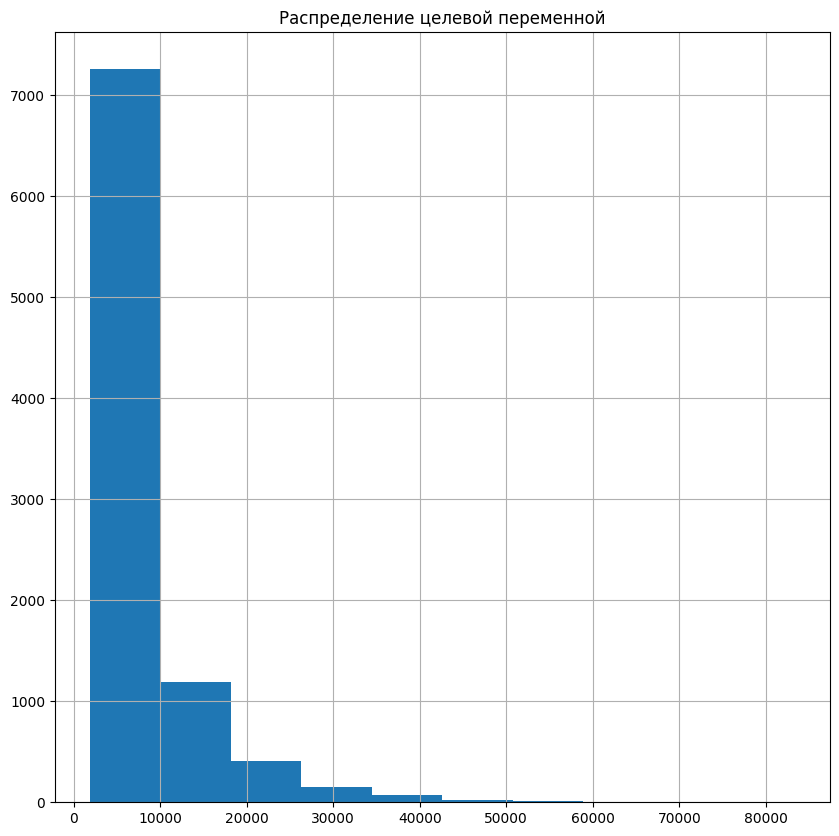

In [14]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

In [27]:
# В продажах реклама играет ключевое значение. Посмотрим какие были взаимодействия.

train_data.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [28]:
# Посмотрим какое из маркетинговых предложений имело лучшие отклики

offer_type = train_data.loc[train_data['Response'] == 'Yes',].groupby(['Renew Offer Type']).count()['Customer']/train_data.groupby('Renew Offer Type').count()['Customer']
offer_type

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

Учитывая специфику данных можно предположить что мы расчитываем доход страховой компании с каждого клиента за весь период сотрудничества до ухода клиента в другую компанию. Однако отклик на маркетинговые предлождения составляет менее 15% от общего числа клиентов.
Мы не знаем процессов привлечения и удержания клиентов, делаются ли подобные предложения только клиентам которые не хотят продлевать сотрудничечества или это часть общей воронки продаж.

Попробуем найти другие факторы влияющие на целевой показатель


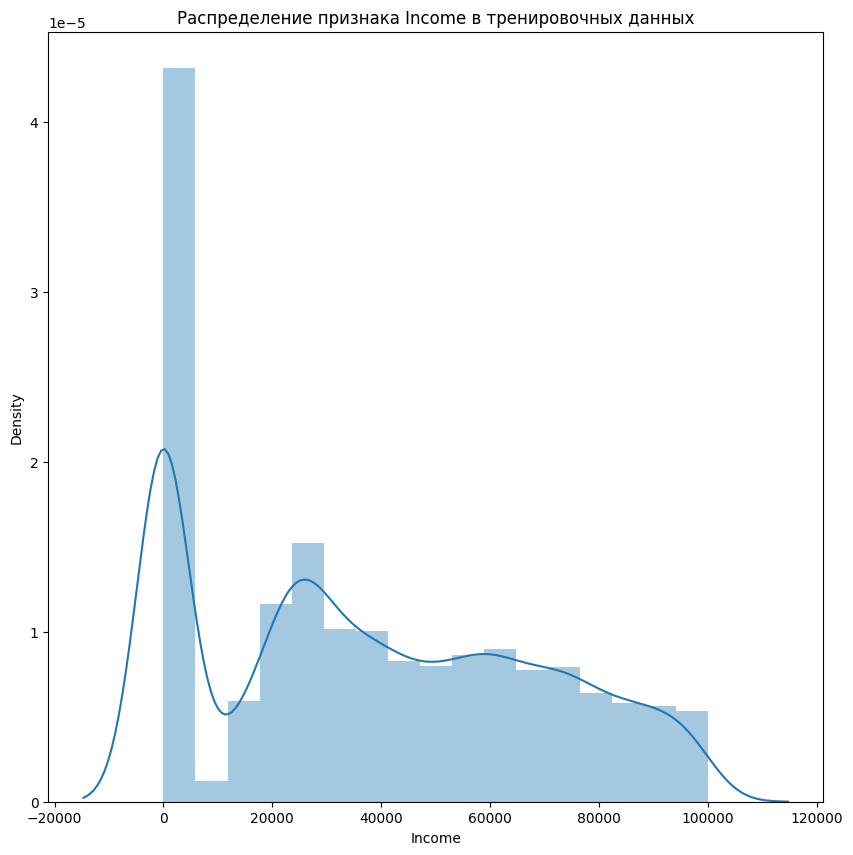

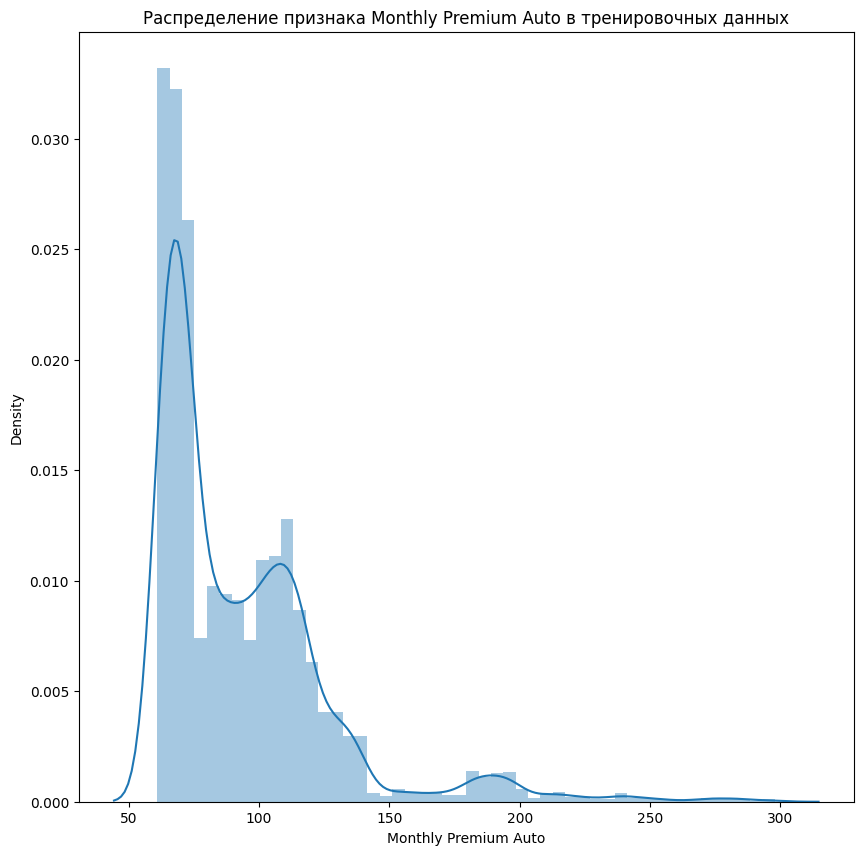

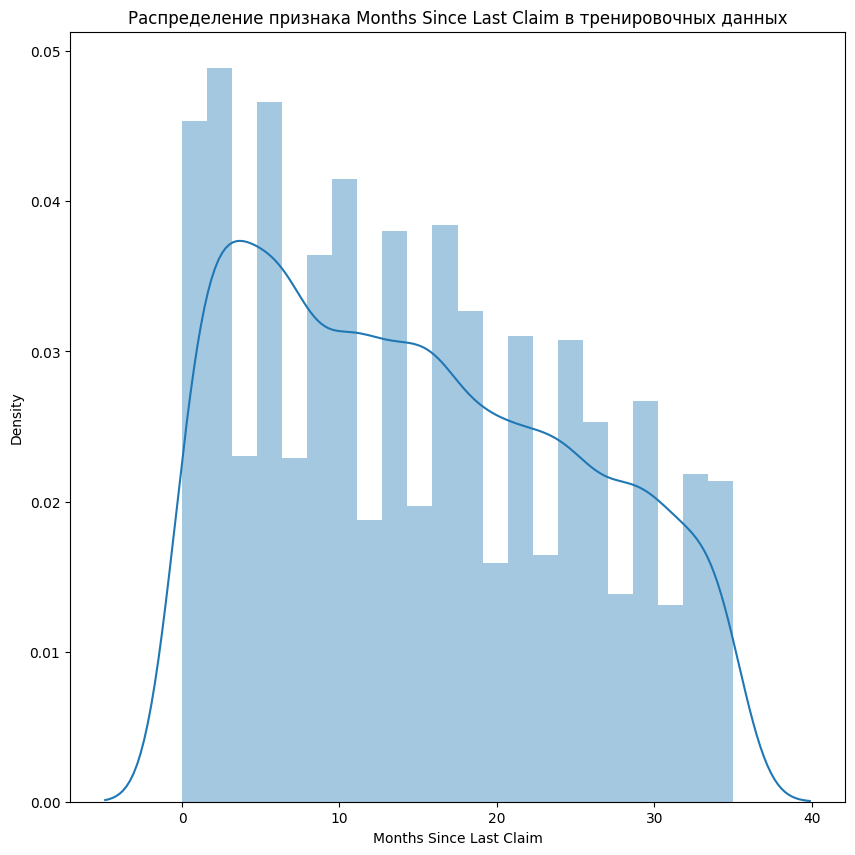

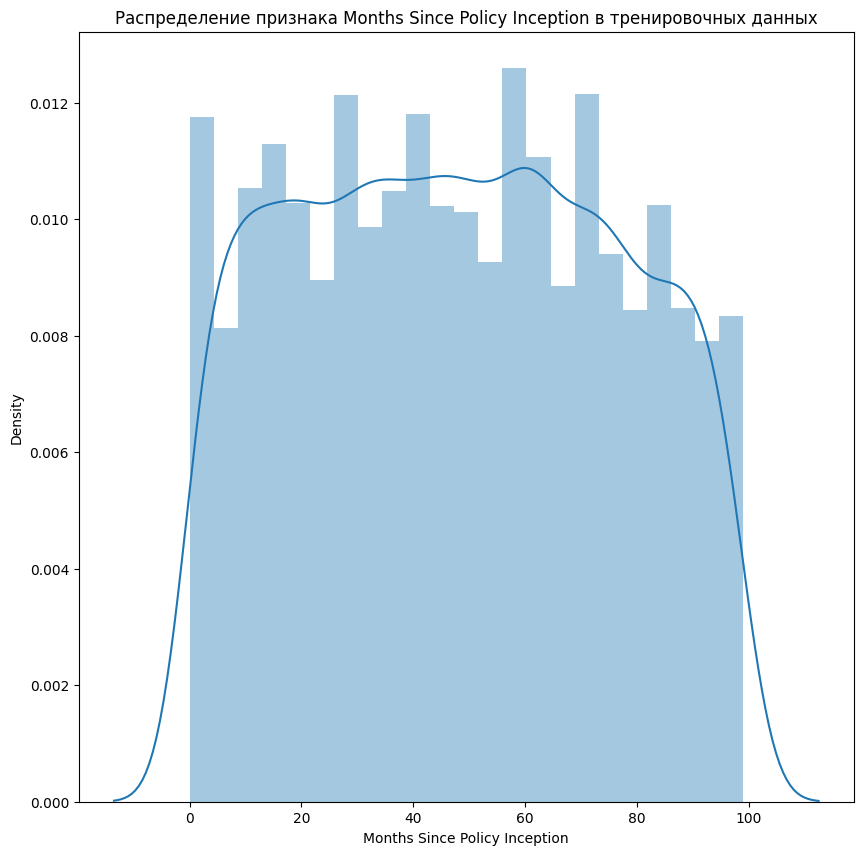

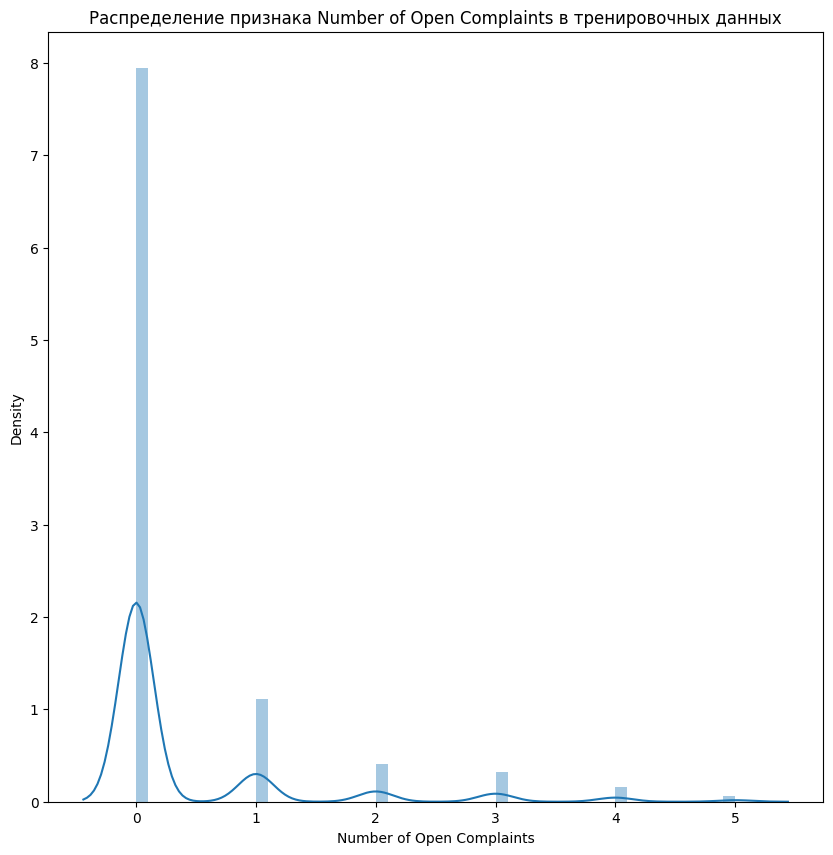

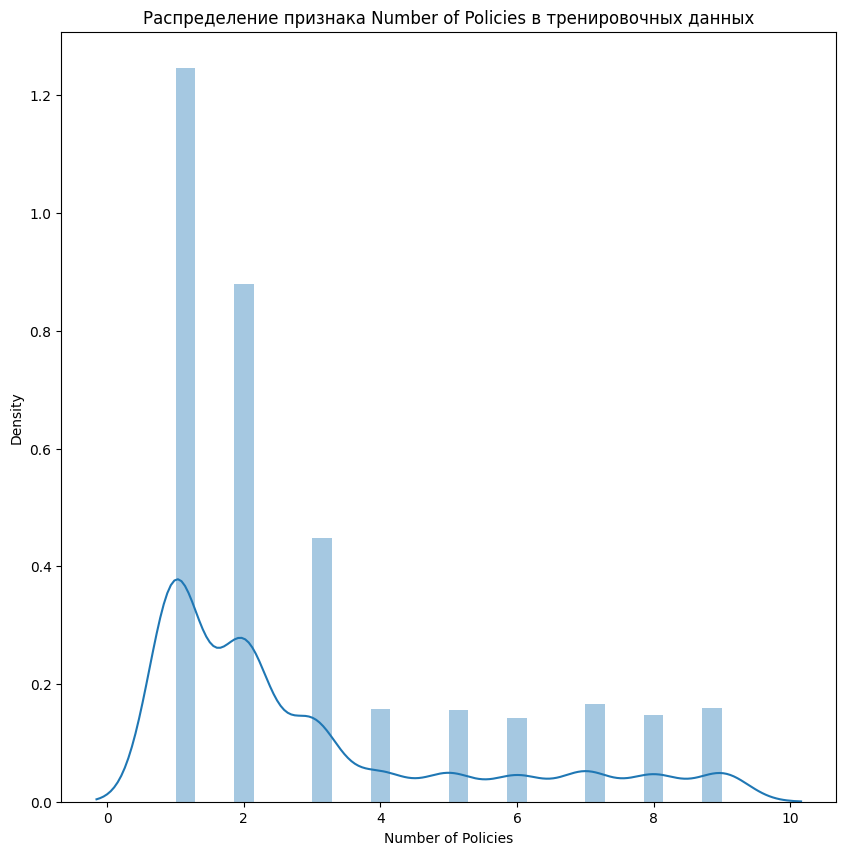

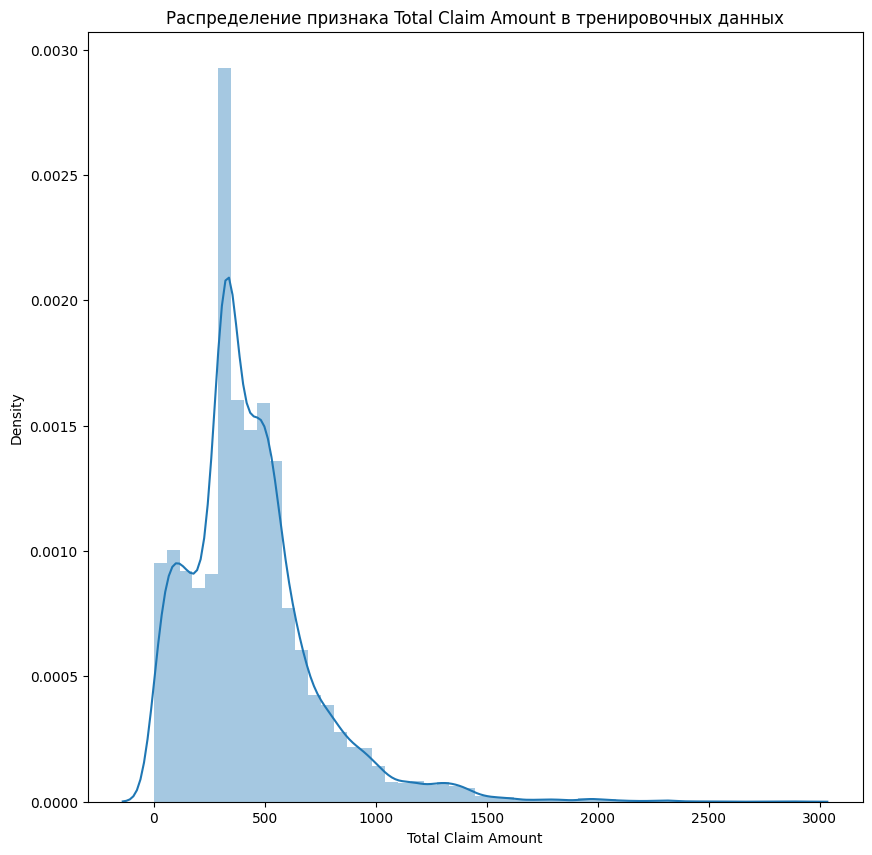

In [15]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

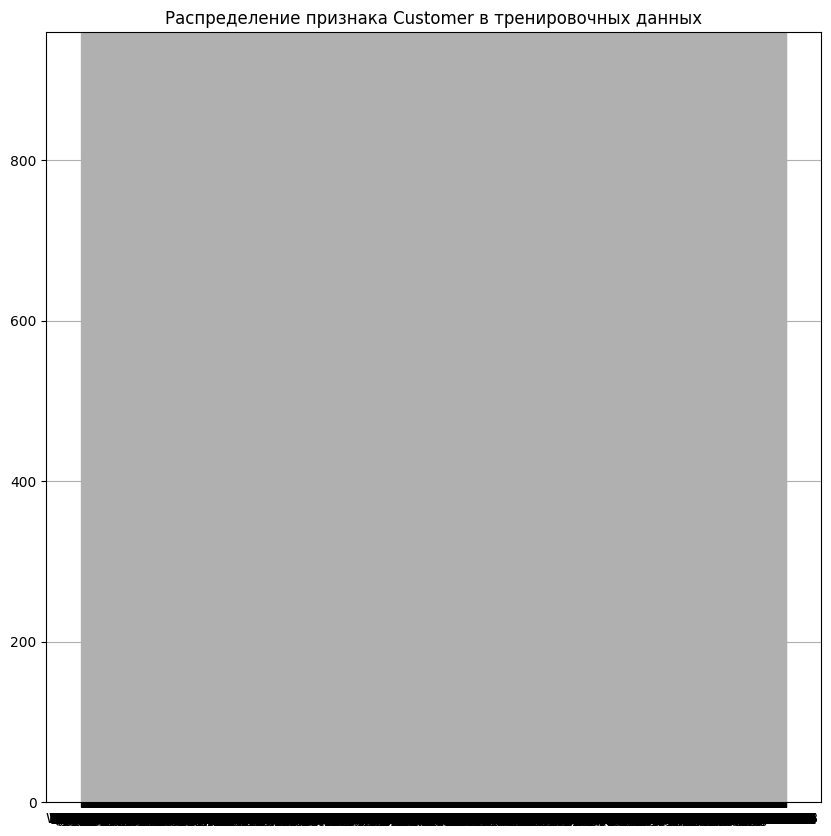

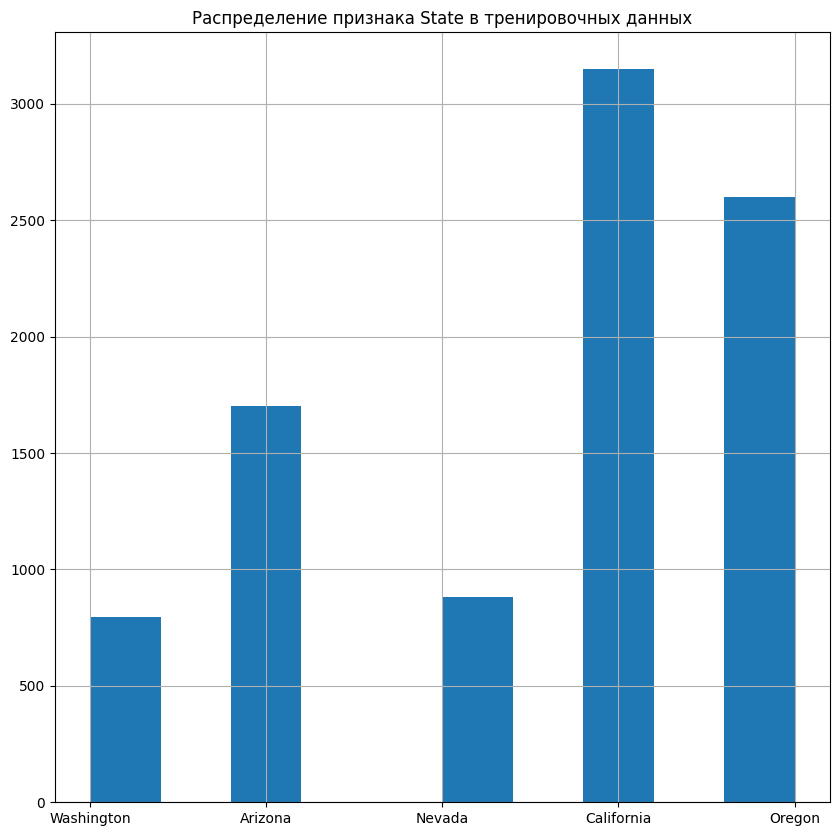

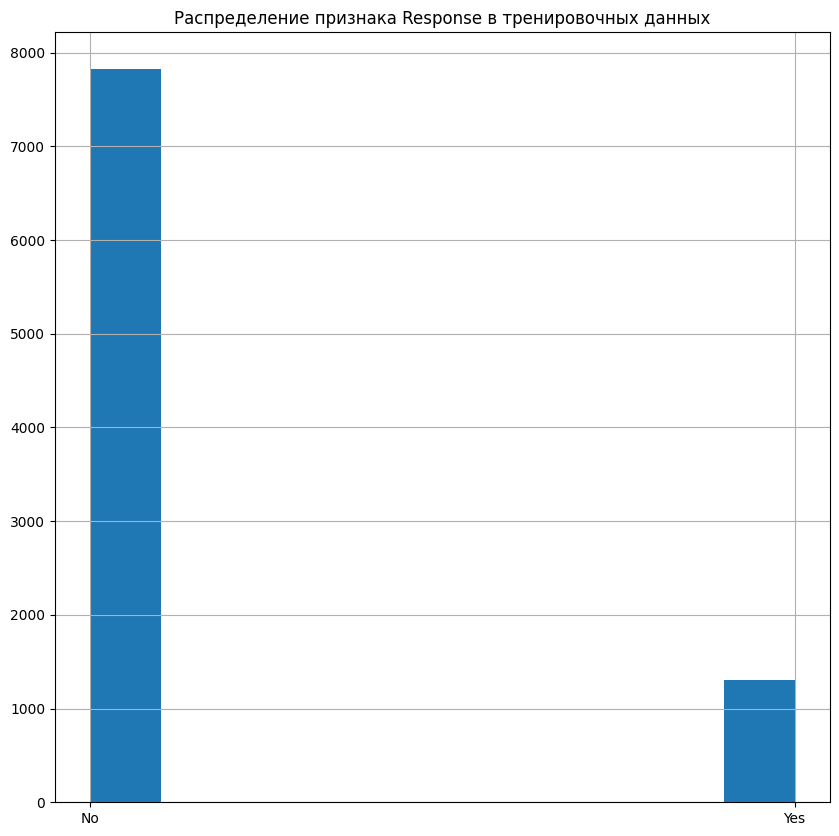

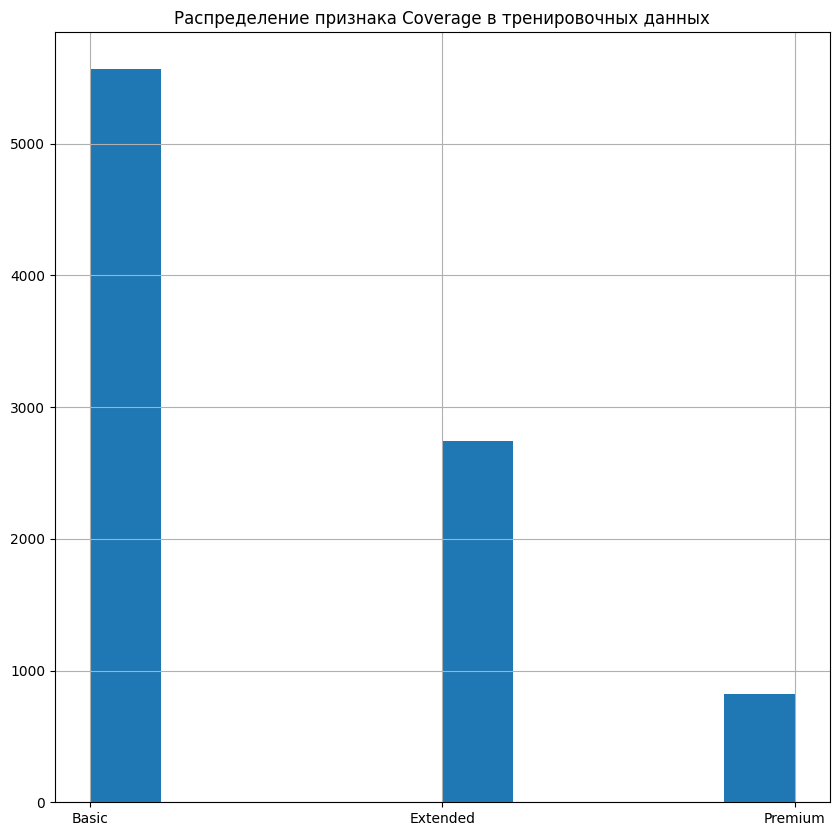

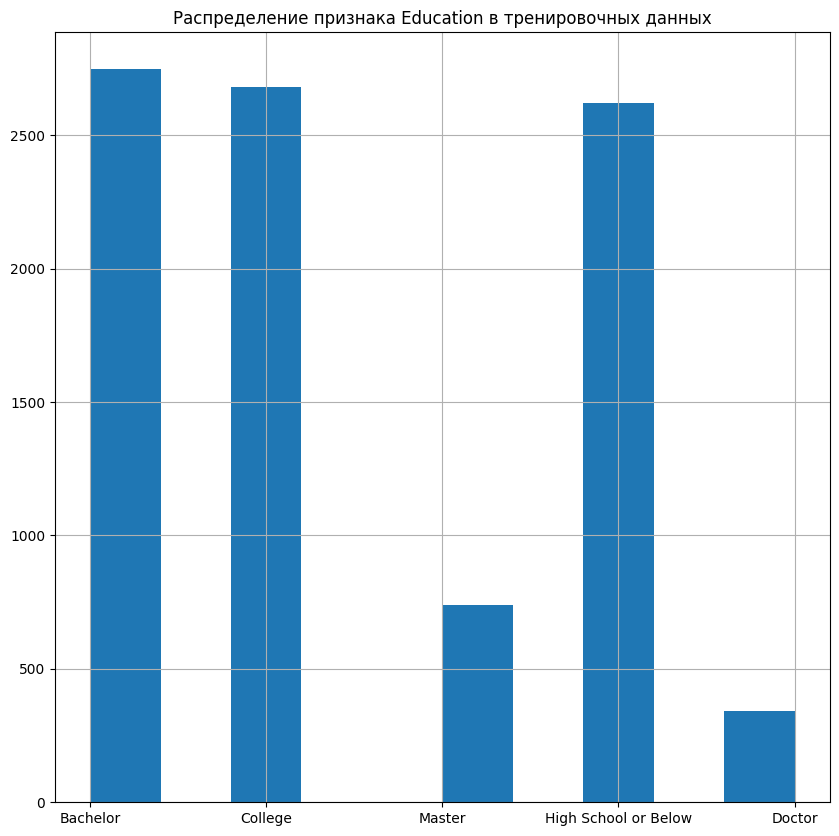

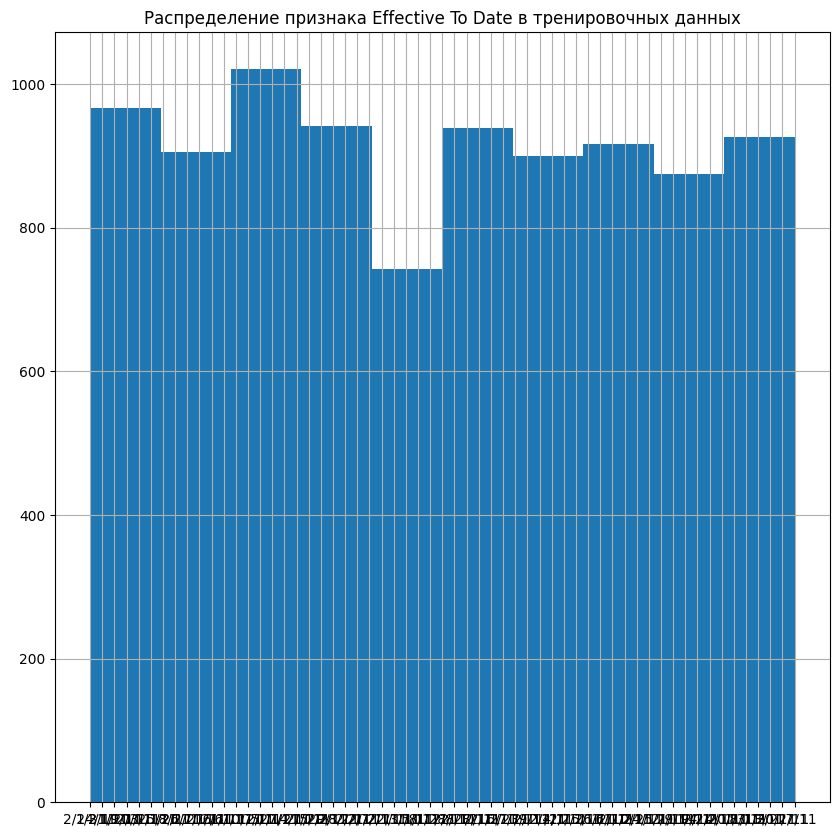

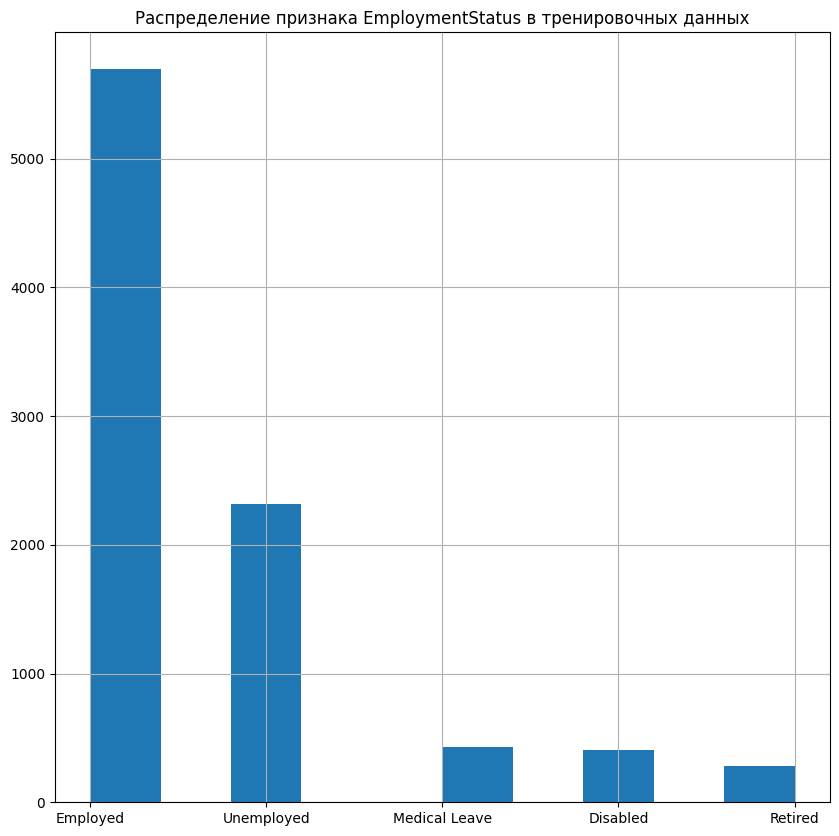

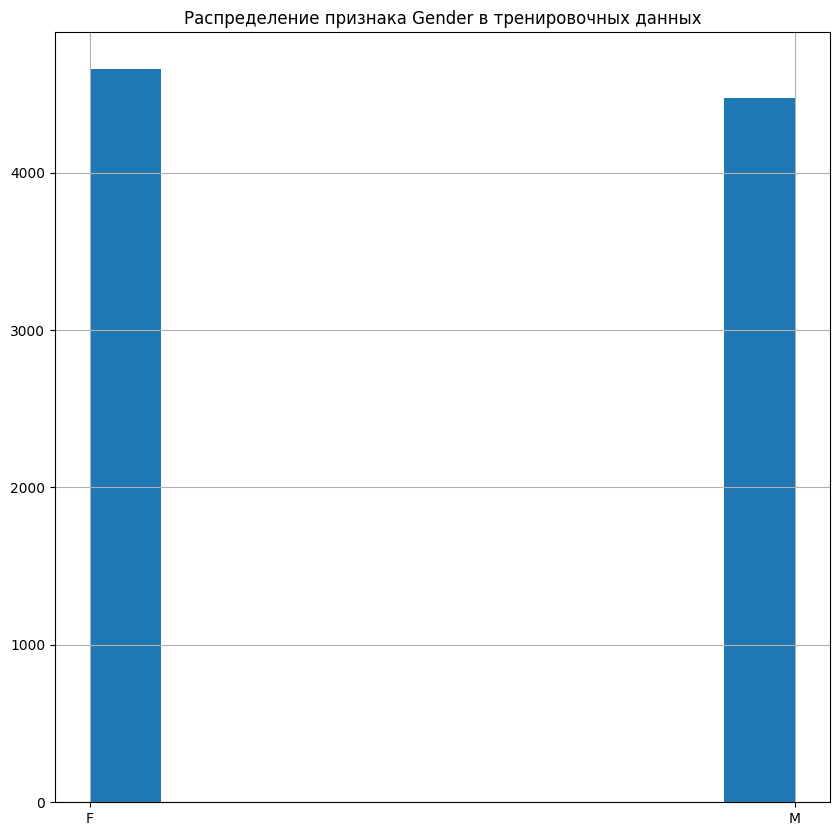

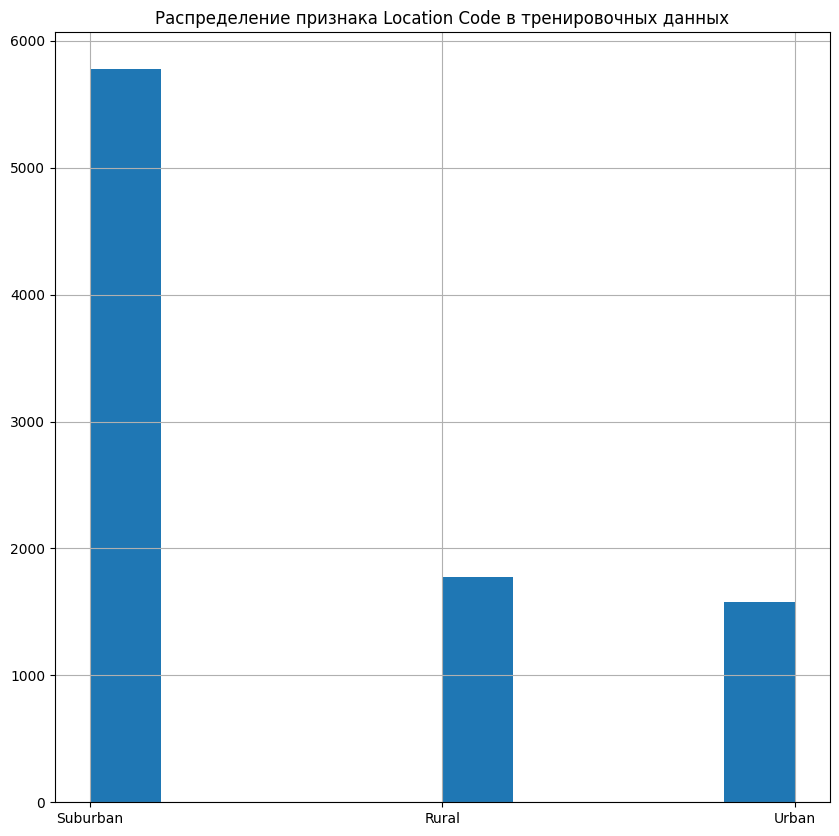

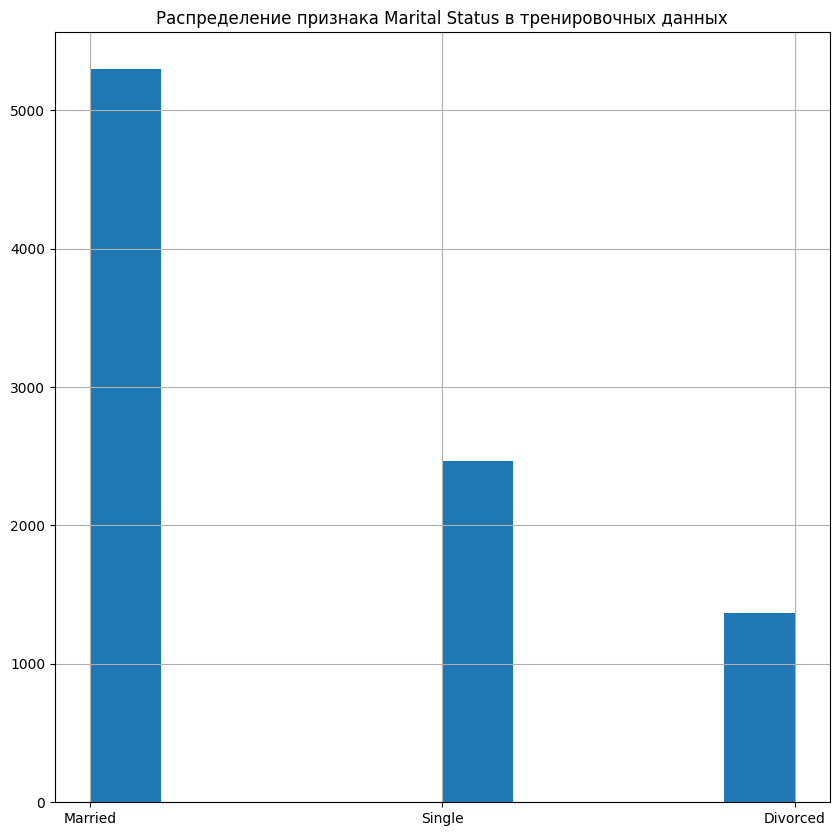

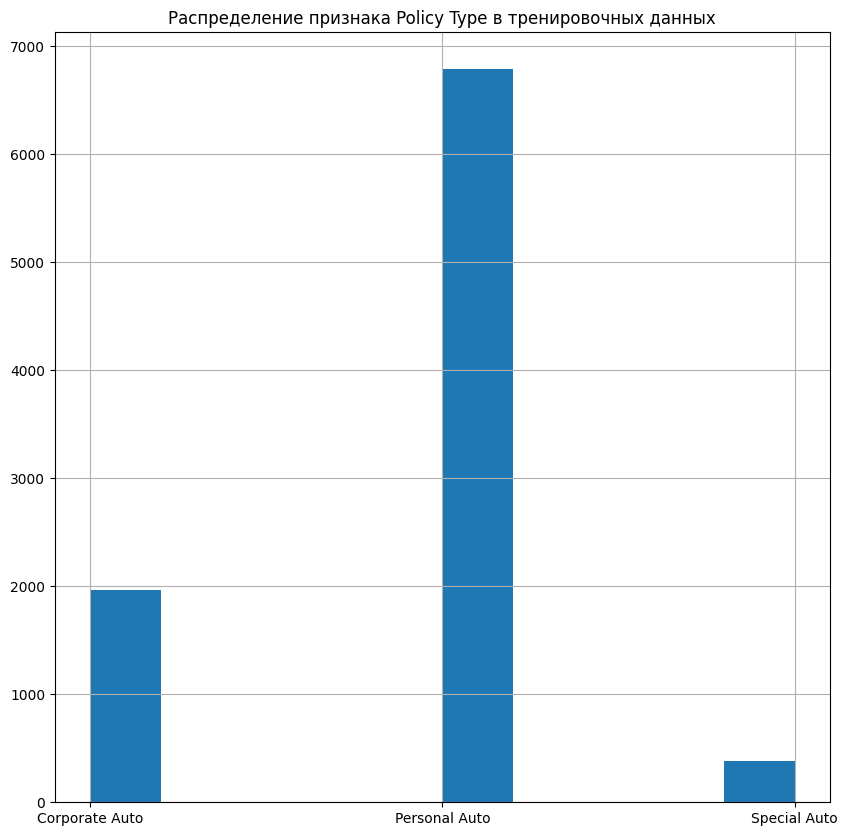

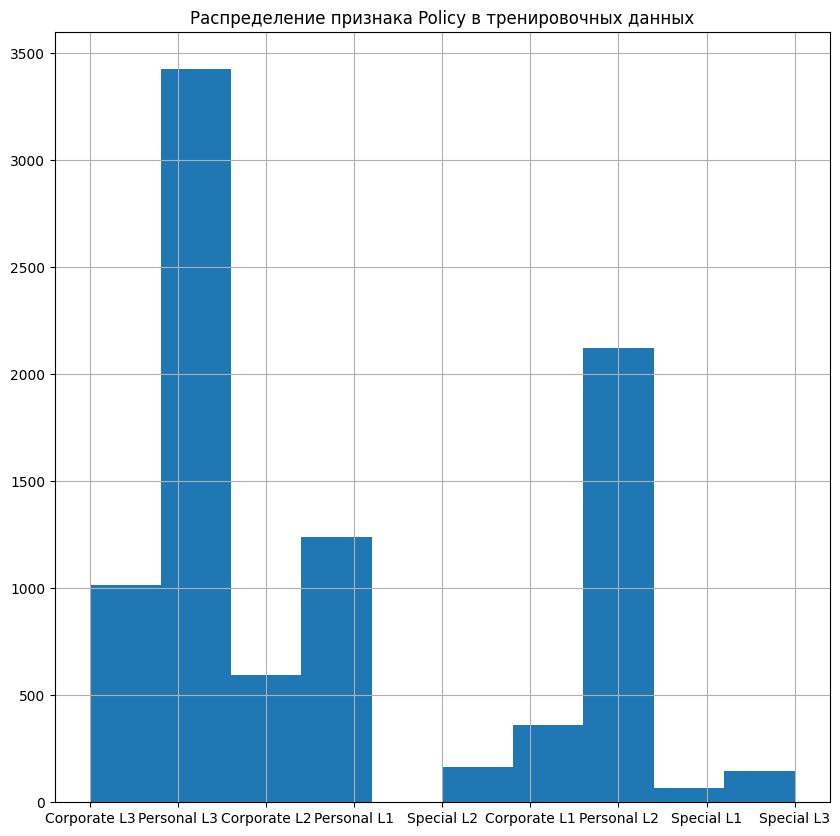

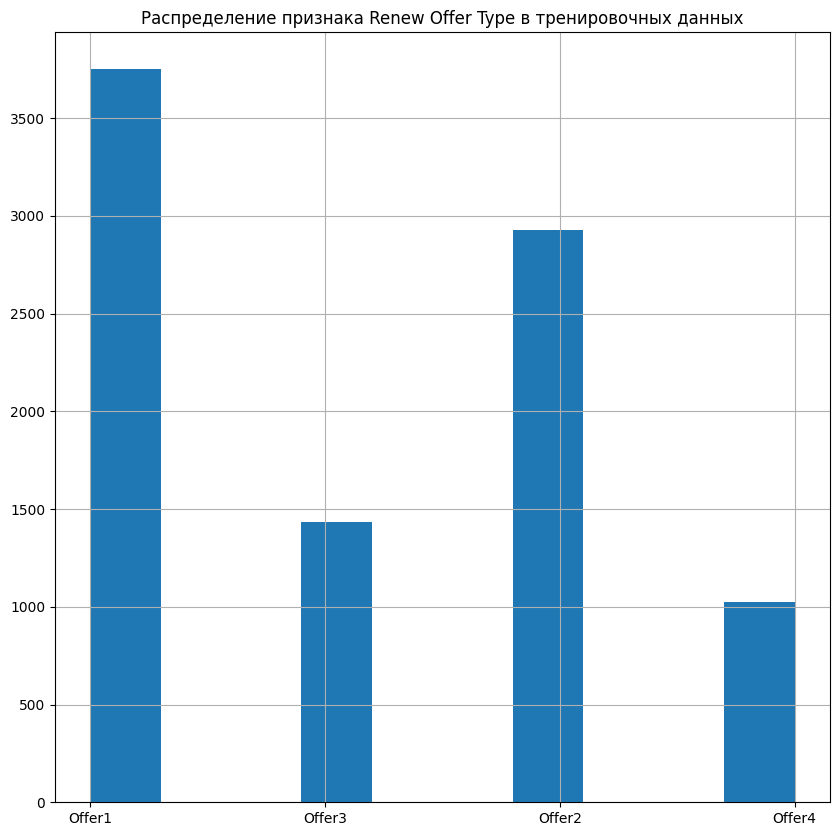

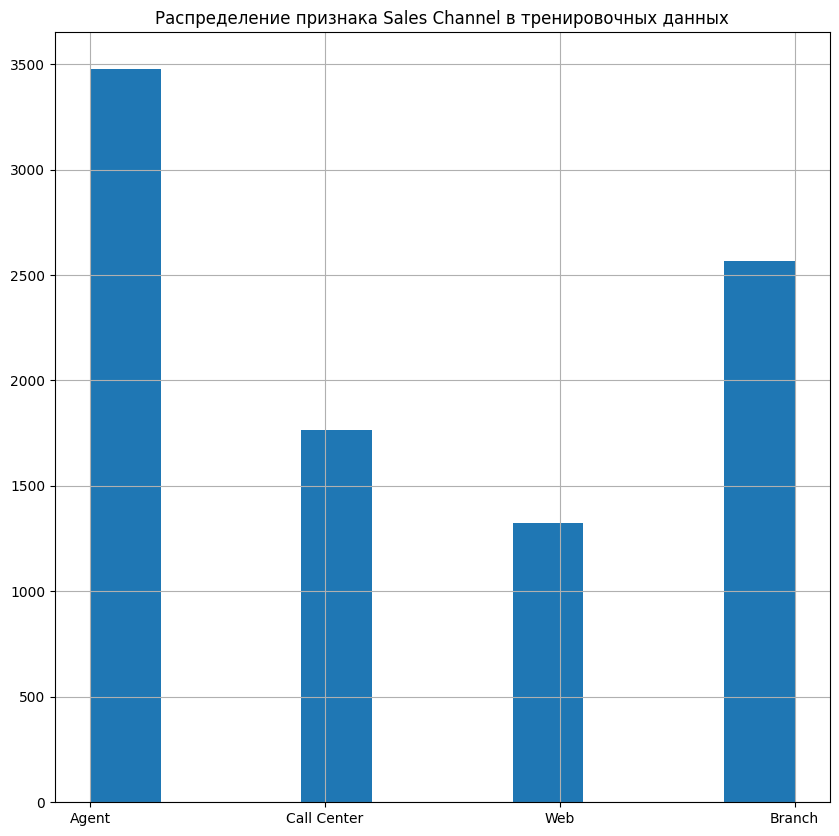

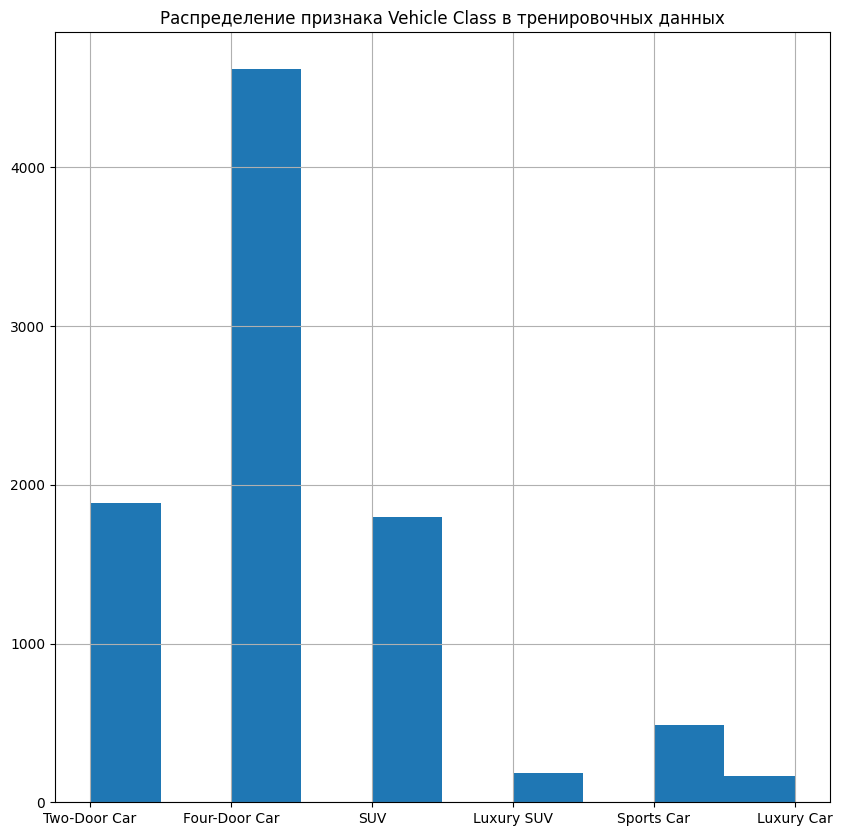

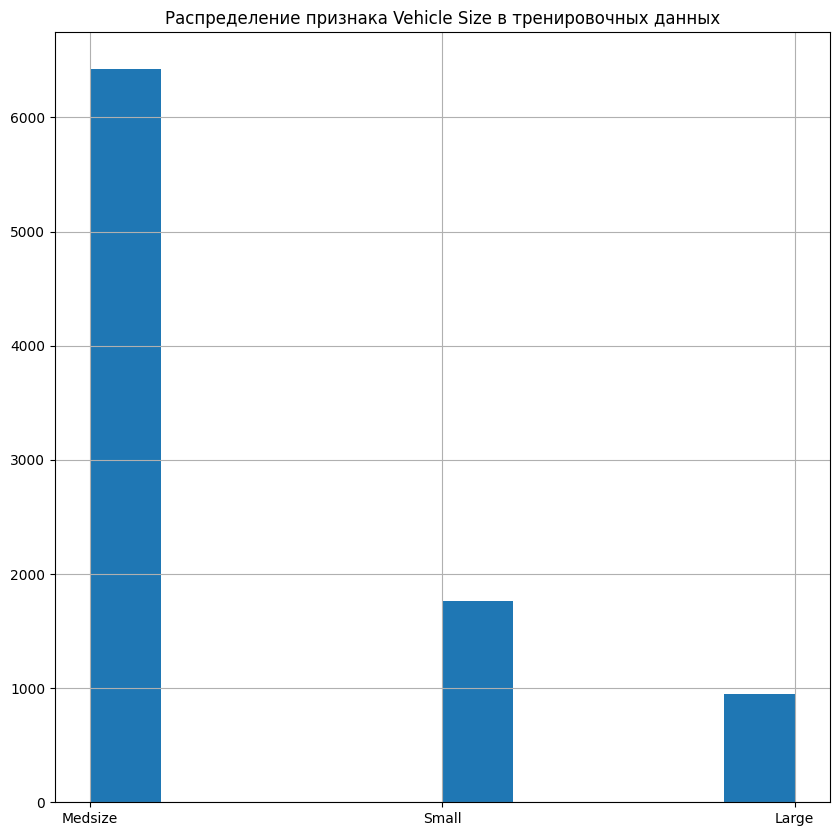

In [16]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist()

Не являясь специалистом в исследуемой области сложно делать выводы о структуре данных. Для многих показателей нет нормального распределения, другие данные не сбалансированы, в сичловых парамертах имеются "хвосты".

Попробуем определить наличие выбросов используя метод Альтмана z-score.

In [17]:
# Импортируем нужные библиотеки

import numpy as np
from scipy import stats

In [22]:
result = ''
for col in num_cols:
  z = np.abs(stats.zscore(X[col]))
  threshold = 3
  outliers = X[col][z > threshold]
  if len(outliers) > 0:
            result += f'В столбце {col}, {len(outliers)} выбросов. Среднее по столбцу {X[col].mean()}\n'

print(result)

В столбце Monthly Premium Auto, 200 выбросов. Среднее по столбцу 93.21929056273265
В столбце Number of Open Complaints, 205 выбросов. Среднее по столбцу 0.38438800087584846
В столбце Total Claim Amount, 158 выбросов. Среднее по столбцу 434.0887943128969



Выбранный метод показывает незначительные выбросы в количественных данных. Интерпретировать их ценность и понять являются ли эти данные выбросами или спецификой выбранной отрасли сложно.

Ссылка на исследования не работает без регистрации на платформе https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

Поиск открытых источников с разъяснением сути параметров не дал нужного результата.

In [29]:
# Преобразуем стороковые признаки в числовые

from sklearn.preprocessing import LabelEncoder
# from scipy.stats.mstats import winsorize

In [32]:
# Удалим столбец с id пользователя

X = X.drop('Customer', axis = 1)

In [30]:
LabelEncoder = LabelEncoder()
for col in str_cols:
    X[col] = LabelEncoder.fit_transform(X[col].astype(str))

In [33]:
X.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,0,0,0,47,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,0,1,0,24,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,0,2,0,41,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,1,0,0,0,12,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,4,0,0,0,52,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


In [40]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

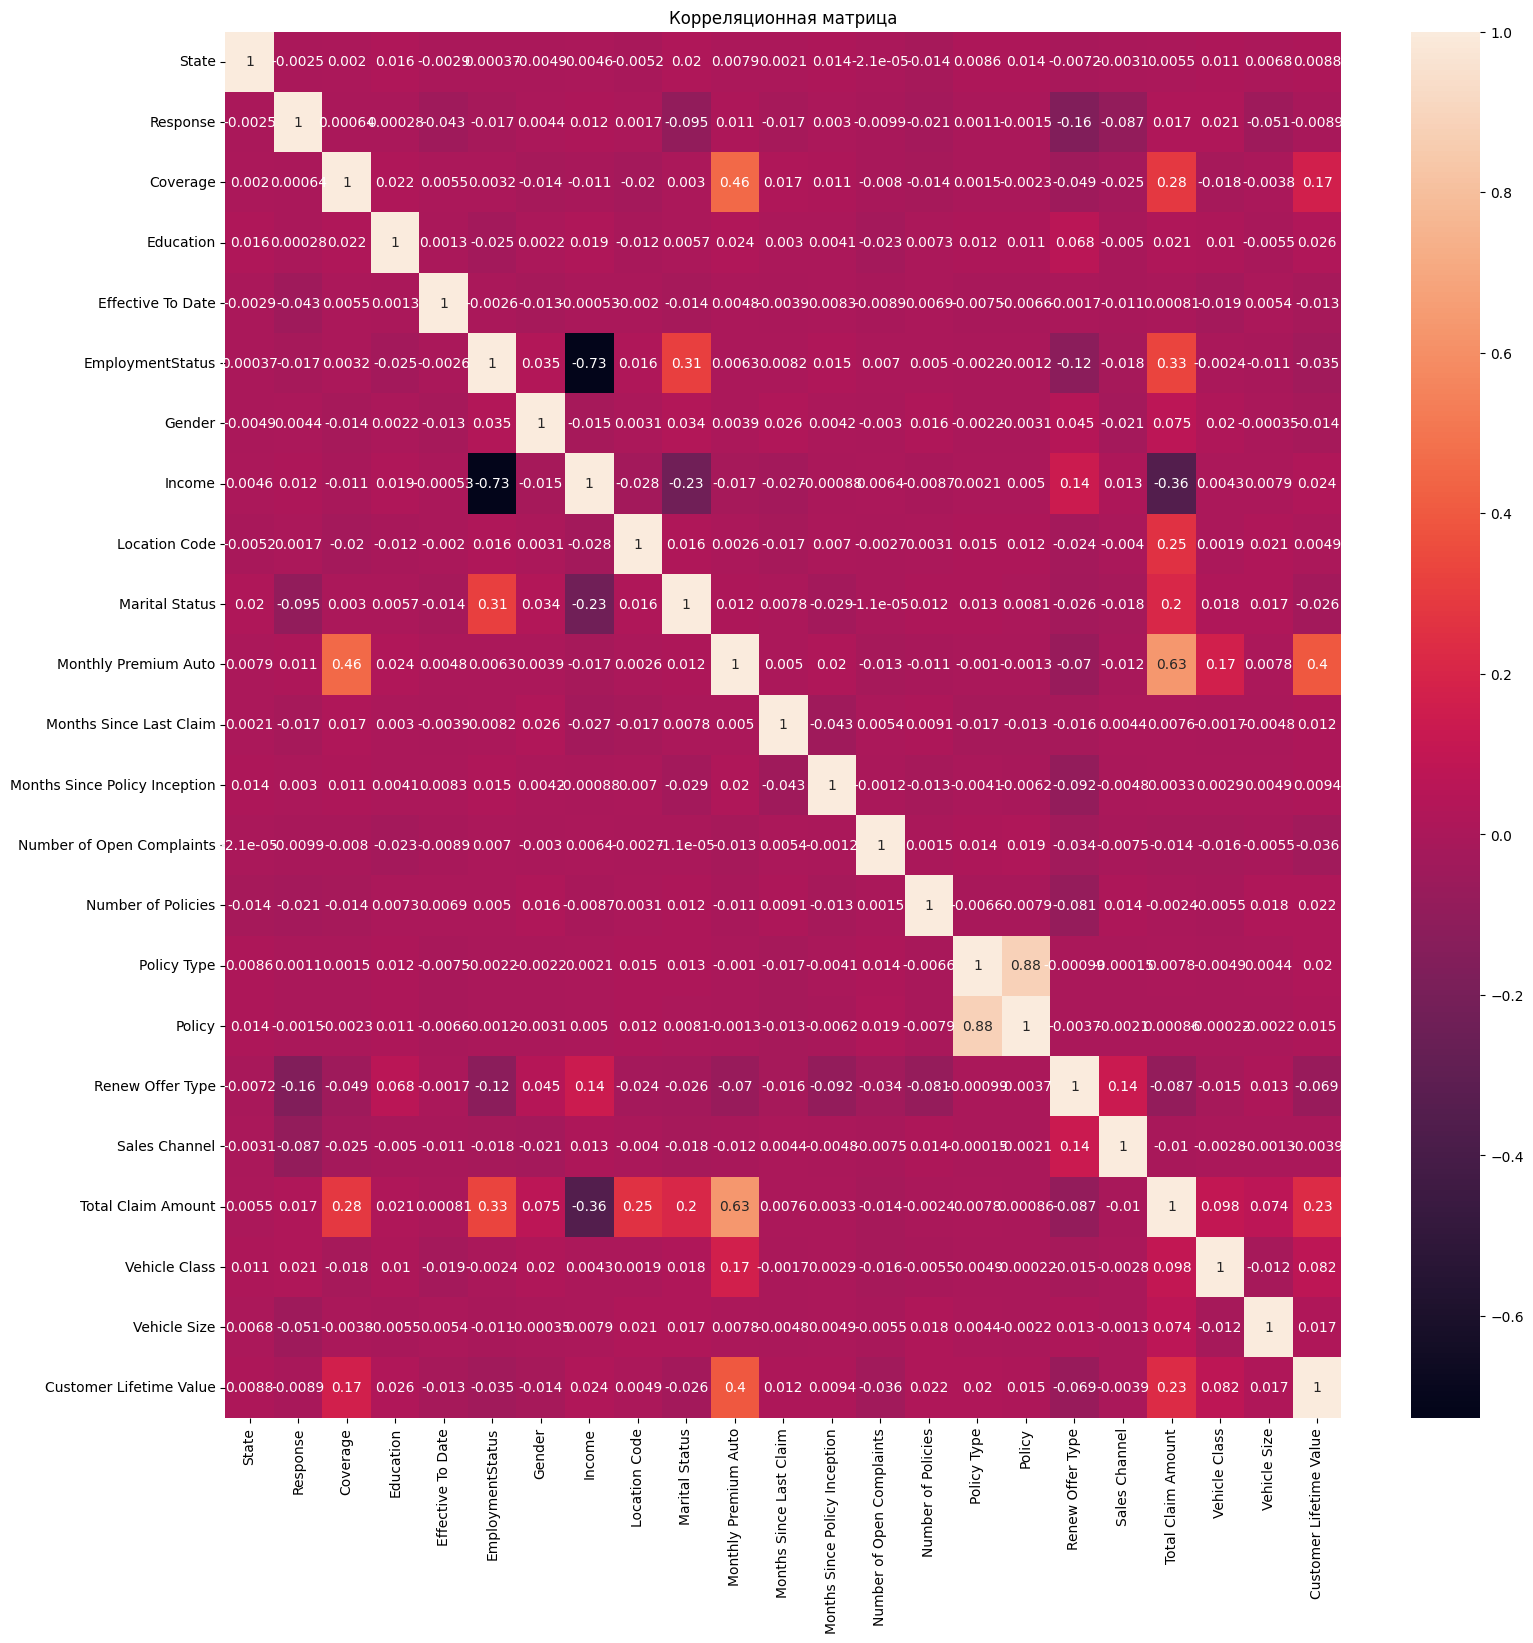

In [43]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()



# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

In [48]:
train_data_trasformed

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,1.753720,-0.408822,-0.732899,-1.124597,1.079814,-0.612669,-0.980269,0.612827,0.034524,-0.188771,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-1.735273,-1.119497,-0.962979,-1.031138,-0.169640,1.499181,-0.166682,2763.519279
1,-1.352592,-0.408822,0.791999,-1.124597,-0.271832,1.613313,-0.980269,-1.239617,0.034524,1.381572,0.022691,-0.208186,-0.217334,-0.422250,2.106160,0.365732,0.748626,1.022092,-1.031138,2.400737,-0.912924,-0.166682,6979.535903
2,0.200564,-0.408822,2.316897,-1.124597,0.727211,-0.612669,-0.980269,0.365710,0.034524,-0.188771,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.365732,0.748626,-0.962979,-1.031138,0.455734,1.499181,-0.166682,12887.431650
3,-0.576014,-0.408822,-0.732899,-1.124597,-0.977039,1.613313,1.020128,-1.239617,0.034524,-0.188771,0.371467,0.288205,0.606907,-0.422250,1.687759,-1.735273,-1.742204,-0.962979,0.839080,0.329769,0.534339,-0.166682,7645.861827
4,1.753720,-0.408822,-0.732899,-1.124597,1.373650,-0.612669,1.020128,0.203390,-1.616461,1.381572,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,0.365732,-0.496789,-0.962979,-1.031138,-1.018843,-0.912924,-0.166682,2813.692575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,-0.576014,-0.408822,-0.732899,-1.124597,0.198306,-0.612669,1.020128,1.128558,1.685508,-0.188771,-0.587666,0.288205,1.466984,-0.422250,-0.404247,0.365732,-0.496789,0.029557,1.774189,-0.811934,-0.912924,-0.166682,23405.987980
9130,-0.576014,2.446054,0.791999,-0.400957,0.315840,-0.612669,-0.980269,-0.528450,0.034524,-1.759114,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-1.735273,-1.119497,-0.962979,-0.096029,-0.188956,-0.912924,-0.166682,3096.511217
9131,-0.576014,-0.408822,0.791999,-1.124597,1.549952,1.613313,1.020128,-1.239617,0.034524,1.381572,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,-1.735273,-1.742204,-0.962979,-0.096029,1.227937,-0.912924,-0.166682,8163.890428
9132,-0.576014,-0.408822,0.791999,-0.400957,1.373650,-0.612669,1.020128,-0.517356,0.034524,-0.188771,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.365732,0.125919,1.022092,-0.096029,0.885113,-0.912924,-2.027897,7524.442436


In [49]:
train_data_trasformed
X_t = train_data_trasformed.drop('Customer Lifetime Value', axis = 1)

Матрица корреляции показывает екзначительные зависисмости целевого показателя от Coverage, Monthly Premium Auto, Total Claim Amount.
Удивляет что покаатель Months Since Policy Inception не оказывает никакого значительного влияния, хотя исходя из логики бизнеса время в которое клиент платит за страховку должен быть один из ключевых.

Непонятно какую пользу бизнесу дает подобное исследование, потому что прямая связь между стоимостью полиса и выплат по нему очевидна и без исследований.

Актуальным для бизнеса может быть ответ на вопрос как продать клиентам более дорогую страховку и как минимизировать выплаты - но для этого недостатояно данных. Нужно просчитывать рейтинг аварийности клиента.

Возможно слудует сконцентрировать внимание на тех данных ,на которые мы можем повлиять. Самым подходящим является оценка эффективности маркетинговых предложений, но тогда нам придется убрать более 85% данных.

Посмотрим что нам дадут обучение моделей.

Подберем модели для обучения. Так как мы определяем количественный признак, то перед нами задача регрессии.

Первой моделью возьмем линейную регрессиию с кросс валидацией

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [38]:
l_reg = LinearRegression()
cv = cross_validate(l_reg, X, y, cv = 5)
print(" Результат для линейной регрессии:", sum(cv['test_score']) / len(cv['test_score']))

 Результат для линейной регрессии: 0.15735125061938096


Результат неудовлетворительный. Попробуем еще несколько моделей для этого типа задач.


In [44]:
# Регрессия Байесовского хребта
from sklearn.linear_model import BayesianRidge

bayes_reg = BayesianRidge().fit(X, y)
cv_bayes= cross_validate(bayes_reg, X, y, cv = 5)
print("Результат регрессии Байесовского хребта:", sum(cv_bayes['test_score']) / len(cv_bayes['test_score']))

Результат регрессии Байесовского хребта: 0.15730051256599586


In [47]:
from sklearn import linear_model
clf = linear_model.ARDRegression().fit(X, y)
cv_ard= cross_validate(clf, X, y, cv = 5)
print("Результат ARDRegression:", sum(cv_ard['test_score']) / len(cv_ard['test_score']))

Результат ARDRegression: 0.1566499406011088


Все полученные результаты неудовлетворительны. Попробуем сократить датафрейм только до зависимых между собой данных.

In [53]:
df = X_t[['Monthly Premium Auto', 'Total Claim Amount', 'Coverage']]
df.head()

,Monthly Premium Auto,Total Claim Amount,Coverage
0,-0.703925,-0.169640,-0.732899
1,0.022691,2.400737,0.791999
2,0.429596,0.455734,2.316897
3,0.371467,0.329769,-0.732899
4,-0.587666,-1.018843,-0.732899


In [55]:
l_reg = LinearRegression()
cv3 = cross_validate(l_reg, df, y, cv = 5)
print(" Результат для линейной регрессии:", sum(cv3['test_score']) / len(cv3['test_score']))

 Результат для линейной регрессии: 0.1548799673300675


In [58]:
df2 = X_t[['Monthly Premium Auto']]
cv4 = cross_validate(l_reg, df2, y, cv = 5)
print(" Результат для линейной регрессии:", sum(cv4['test_score']) / len(cv4['test_score']))

 Результат для линейной регрессии: 0.15459872656743817


### Выводы.

Ни одна модель не показала приемлемого результата. Очевидно что в исходных данных нет определяющих параметров. Единственным способом создать более достоверную предсказательную модель будет создание новых признаков, на основании имеющихся. Однако для этого нужно понимать принципы работы страховых компаний и законодательство страны откуда взяты эти данные.

Можно предположить что класс автомобиля и рейтинг аварийности клиента влияют на формирование конечной стоимости страховки, которая в свою очередь является определяющей для целевого показателя Customer Lifetime Value.

Но как то влиять на данный параметр мы не можем.

Хоть какую то пользу бизнесу могут принести исследования причин отказа клиентов от маркетинговых предложений и нахождения тех оферов которые дают лучший результат и продлевают жизненный цикл клиента.